In [1]:
import pandas as pd

In [2]:
hr_df = pd.read_csv('../../../../data/public_data/cleaned/fitbit/cleaned_heart_rate.csv')
hr_df.head()

,Id,Time,Value
0,2022484408,2016-04-01 07:54:00,93
1,2022484408,2016-04-01 07:54:05,91
2,2022484408,2016-04-01 07:54:10,96
3,2022484408,2016-04-01 07:54:15,98
4,2022484408,2016-04-01 07:54:20,100


### Converting the heart rate data into per minute values

In [3]:
# first converting the time column to datetime data type
hr_df['Time'] = pd.to_datetime(hr_df['Time'])
hr_df['Time']

0         2016-04-01 07:54:00
1         2016-04-01 07:54:05
2         2016-04-01 07:54:10
3         2016-04-01 07:54:15
4         2016-04-01 07:54:20
                  ...        
3614910   2016-05-12 14:43:53
3614911   2016-05-12 14:43:58
3614912   2016-05-12 14:44:03
3614913   2016-05-12 14:44:18
3614914   2016-05-12 14:44:28
Name: Time, Length: 3614915, dtype: datetime64[ns]

In [4]:
for id, grouped_df in hr_df.groupby('Id'):
    print(id)
    mean_minute_vals = grouped_df[grouped_df['Id'] == id].resample('1Min', on='Time')['Value'].mean() 
    
    print(mean_minute_vals)
    break

2022484408
Time
2016-04-01 07:54:00     99.600000
2016-04-01 07:55:00    110.111111
2016-04-01 07:56:00     92.555556
2016-04-01 07:57:00     90.400000
2016-04-01 07:58:00     97.875000
                          ...    
2016-05-12 15:44:00     76.714286
2016-05-12 15:45:00     71.833333
2016-05-12 15:46:00     71.000000
2016-05-12 15:47:00     70.571429
2016-05-12 15:48:00     71.000000
Freq: T, Name: Value, Length: 59515, dtype: float64


In [5]:
def get_mean_min_vals(group):
    mean_minute_vals = group.resample('1Min', on='Time')['Value'].mean() 
    return mean_minute_vals.to_frame()
    
hr_per_min_df = hr_df.groupby('Id').apply(get_mean_min_vals)
print(hr_per_min_df)

                                     Value
Id         Time                           
2022484408 2016-04-01 07:54:00   99.600000
           2016-04-01 07:55:00  110.111111
           2016-04-01 07:56:00   92.555556
           2016-04-01 07:57:00   90.400000
           2016-04-01 07:58:00   97.875000
...                                    ...
8877689391 2016-05-12 14:40:00   56.222222
           2016-05-12 14:41:00   57.857143
           2016-05-12 14:42:00   56.000000
           2016-05-12 14:43:00   57.500000
           2016-05-12 14:44:00   55.333333

[772967 rows x 1 columns]


### Combine with minutes activity data to draw further insights

In [6]:
mins_df = pd.read_csv('../../../../data/public_data/cleaned/fitbit/cleaned_activity_minutes.csv')
mins_df.head()

,Id,ActivityMinute,Calories,Intensity,METs,Steps
0,1503960366,2016-03-12 00:00:00,0.7973,0,1.0,0
1,1503960366,2016-03-12 00:01:00,0.7973,0,1.0,0
2,1503960366,2016-03-12 00:02:00,0.7973,0,1.0,0
3,1503960366,2016-03-12 00:03:00,0.7973,0,1.0,0
4,1503960366,2016-03-12 00:04:00,0.7973,0,1.0,0


In [7]:
# removing not needed data fields:
mins_df = mins_df.drop(columns=['Calories', 'METs', 'Steps'])
mins_df.head()

,Id,ActivityMinute,Intensity
0,1503960366,2016-03-12 00:00:00,0
1,1503960366,2016-03-12 00:01:00,0
2,1503960366,2016-03-12 00:02:00,0
3,1503960366,2016-03-12 00:03:00,0
4,1503960366,2016-03-12 00:04:00,0


In [8]:
# rename index for merging
hr_per_min_df.index.names = ['Id', 'ActivityMinute']
hr_per_min_df.head()

Value
Id         ActivityMinute                 
2022484408 2016-04-01 07:54:00   99.600000
           2016-04-01 07:55:00  110.111111
           2016-04-01 07:56:00   92.555556
           2016-04-01 07:57:00   90.400000
           2016-04-01 07:58:00   97.875000

In [9]:
# convert to multi-index for merging
mins_df['ActivityMinute'] = pd.to_datetime(mins_df['ActivityMinute'])
mins_df = mins_df.set_index(['Id', 'ActivityMinute'])
mins_df

Intensity
Id         ActivityMinute                
1503960366 2016-03-12 00:00:00          0
           2016-03-12 00:01:00          0
           2016-03-12 00:02:00          0
           2016-03-12 00:03:00          0
           2016-03-12 00:04:00          0
...                                   ...
8877689391 2016-05-12 13:55:00          0
           2016-05-12 13:56:00          0
           2016-05-12 13:57:00          0
           2016-05-12 13:58:00          0
           2016-05-12 13:59:00          0

[2760120 rows x 1 columns]

In [10]:
hr_intensity_df = pd.merge(hr_per_min_df, mins_df, left_index=True, right_index=True)

In [11]:
hr_intensity_df = hr_intensity_df.reset_index().set_index('Id')
hr_intensity_df.head()

,ActivityMinute,Value,Intensity
Id,,,
2022484408,2016-04-01 07:54:00,99.600000,1
2022484408,2016-04-01 07:55:00,110.111111,1
2022484408,2016-04-01 07:56:00,92.555556,1
2022484408,2016-04-01 07:57:00,90.400000,0
2022484408,2016-04-01 07:58:00,97.875000,1


In [12]:
hr_intensity_df.isna().sum()

ActivityMinute         0
Value             293706
Intensity              0
dtype: int64

In [13]:
# drop null cases - non existant hr values don't provide use for hr indicators
hr_intensity_df = hr_intensity_df.dropna()
hr_intensity_df.isna().sum()

ActivityMinute    0
Value             0
Intensity         0
dtype: int64

In [14]:
hr_intensity_df

,ActivityMinute,Value,Intensity
Id,,,
2022484408,2016-04-01 07:54:00,99.600000,1
2022484408,2016-04-01 07:55:00,110.111111,1
2022484408,2016-04-01 07:56:00,92.555556,1
2022484408,2016-04-01 07:57:00,90.400000,0
2022484408,2016-04-01 07:58:00,97.875000,1
...,...,...,...
8877689391,2016-05-12 13:55:00,60.666667,0
8877689391,2016-05-12 13:56:00,61.875000,0
8877689391,2016-05-12 13:57:00,58.142857,0


In [15]:
# Resting HR...
hr_intensity_df[(hr_intensity_df.index == 2022484408)].head(50) # & (hr_intensity_df['Intensity'] == 0)]

,ActivityMinute,Value,Intensity
Id,,,
2022484408,2016-04-01 07:54:00,99.600000,1
2022484408,2016-04-01 07:55:00,110.111111,1
2022484408,2016-04-01 07:56:00,92.555556,1
2022484408,2016-04-01 07:57:00,90.400000,0
2022484408,2016-04-01 07:58:00,97.875000,1
2022484408,2016-04-01 07:59:00,107.625000,1
2022484408,2016-04-01 08:00:00,106.333333,1
2022484408,2016-04-01 08:01:00,106.666667,1
2022484408,2016-04-01 08:02:00,104.375000,1


In [16]:
hr_intensity_df[(hr_intensity_df.index == 2022484408) & (hr_intensity_df['Intensity'] == 0)]['Value'].median()

69.0

In [17]:
hr_intensity_df['Intensity']

Id
2022484408    1
2022484408    1
2022484408    1
2022484408    0
2022484408    1
             ..
8877689391    0
8877689391    0
8877689391    0
8877689391    0
8877689391    0
Name: Intensity, Length: 471487, dtype: int64

In [18]:
# get previous and next values in aim to remove some intensity drops
hr_intensity_df['prev_intensity'] = hr_intensity_df['Intensity'].shift(1)
hr_intensity_df['prev2_intensity'] = hr_intensity_df['Intensity'].shift(2)
hr_intensity_df['prev3_intensity'] = hr_intensity_df['Intensity'].shift(3)



hr_intensity_df['next_intensity'] = hr_intensity_df['Intensity'].shift(-1)
hr_intensity_df['next2_intensity'] = hr_intensity_df['Intensity'].shift(-2)
hr_intensity_df['next3_intensity'] = hr_intensity_df['Intensity'].shift(-3)



In [19]:
hr_intensity_df

,ActivityMinute,Value,Intensity,prev_intensity,prev2_intensity,prev3_intensity,next_intensity,next2_intensity,next3_intensity
Id,,,,,,,,,
2022484408,2016-04-01 07:54:00,99.600000,1,NaN,NaN,NaN,1.0,1.0,0.0
2022484408,2016-04-01 07:55:00,110.111111,1,1.0,NaN,NaN,1.0,0.0,1.0
2022484408,2016-04-01 07:56:00,92.555556,1,1.0,1.0,NaN,0.0,1.0,1.0
2022484408,2016-04-01 07:57:00,90.400000,0,1.0,1.0,1.0,1.0,1.0,1.0
2022484408,2016-04-01 07:58:00,97.875000,1,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
8877689391,2016-05-12 13:55:00,60.666667,0,0.0,0.0,0.0,0.0,0.0,0.0
8877689391,2016-05-12 13:56:00,61.875000,0,0.0,0.0,0.0,0.0,0.0,0.0
8877689391,2016-05-12 13:57:00,58.142857,0,0.0,0.0,0.0,0.0,0.0,NaN


In [20]:
# median_resting_hr - (median to avoid outliers):
hr_intensity_df[(hr_intensity_df.index == 2022484408) & (hr_intensity_df['Intensity'] == 0) & 
                (hr_intensity_df['prev_intensity'] == 0) & 
                (hr_intensity_df['prev2_intensity'] == 0) &
                (hr_intensity_df['prev3_intensity'] == 0) &
                (hr_intensity_df['next_intensity'] == 0) &
                (hr_intensity_df['next2_intensity'] == 0) &
                (hr_intensity_df['next3_intensity'] == 0)
                ]['Value'].median()


66.625

In [21]:
hr_intensity_df = hr_intensity_df.reset_index()
hr_intensity_df

,Id,ActivityMinute,Value,Intensity,prev_intensity,prev2_intensity,prev3_intensity,next_intensity,next2_intensity,next3_intensity
0,2022484408,2016-04-01 07:54:00,99.600000,1,NaN,NaN,NaN,1.0,1.0,0.0
1,2022484408,2016-04-01 07:55:00,110.111111,1,1.0,NaN,NaN,1.0,0.0,1.0
2,2022484408,2016-04-01 07:56:00,92.555556,1,1.0,1.0,NaN,0.0,1.0,1.0
3,2022484408,2016-04-01 07:57:00,90.400000,0,1.0,1.0,1.0,1.0,1.0,1.0
4,2022484408,2016-04-01 07:58:00,97.875000,1,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
471482,8877689391,2016-05-12 13:55:00,60.666667,0,0.0,0.0,0.0,0.0,0.0,0.0
471483,8877689391,2016-05-12 13:56:00,61.875000,0,0.0,0.0,0.0,0.0,0.0,0.0
471484,8877689391,2016-05-12 13:57:00,58.142857,0,0.0,0.0,0.0,0.0,0.0,NaN
471485,8877689391,2016-05-12 13:58:00,61.200000,0,0.0,0.0,0.0,0.0,NaN,NaN


<Axes: >

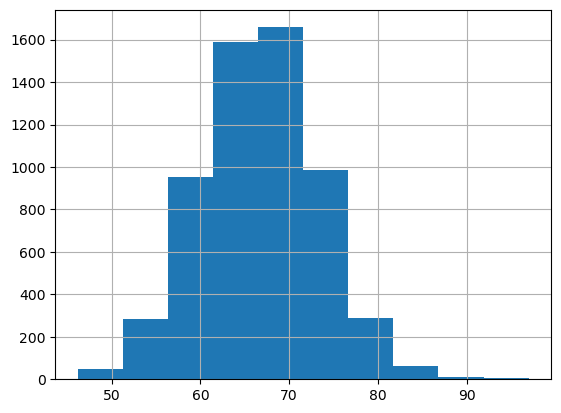

In [22]:
hr_intensity_df[(hr_intensity_df['Id'] == 2022484408) & (hr_intensity_df['Intensity'] == 0) & 
                (hr_intensity_df['prev_intensity'] == 0) & 
                (hr_intensity_df['prev2_intensity'] == 0) &
                (hr_intensity_df['prev3_intensity'] == 0) &
                (hr_intensity_df['next_intensity'] == 0) &
                (hr_intensity_df['next2_intensity'] == 0) &
                (hr_intensity_df['next3_intensity'] == 0)
                
                ]['Value'].hist()

In [23]:
def get_median_resting_hr(group):
    median_resting_hr = group[(group['Intensity'] == 0) & (group['prev_intensity'] == 0) & 
                                    (group['prev2_intensity'] == 0) &
                                    (group['prev3_intensity'] == 0) &
                                    (group['next_intensity'] == 0) &
                                    (group['next2_intensity'] == 0) &
                                    (group['next3_intensity'] == 0)
                                    ]['Value'].median()
    return median_resting_hr

median_resting_hr = hr_intensity_df.groupby(['Id', hr_intensity_df['ActivityMinute'].dt.date]).apply(get_median_resting_hr)

In [24]:
# getting daily median hr for other intensity levels of activity
def get_median_light_activity_hr(group):
    median_light_activity_hr = group[(group['Intensity'] == 1) & (group['prev_intensity'] == 1) & (group['next_intensity'] == 1) &
                                    (group['prev2_intensity'] == 1) &
                                    (group['prev3_intensity'] == 1) &
                                    (group['next2_intensity'] == 1) &
                                    (group['next3_intensity'] == 1)
                                    ]['Value'].median()
    return median_light_activity_hr

median_light_activity_hr = hr_intensity_df.groupby(['Id', hr_intensity_df['ActivityMinute'].dt.date]).apply(get_median_light_activity_hr)


def get_median_moderate_activity_hr(group):
    median_moderate_activity_hr = group[(group['Intensity'] == 2) & (group['prev_intensity'] == 2) & (group['next_intensity'] == 2) &
                                    (group['prev2_intensity'] == 2) &
                                    (group['prev3_intensity'] == 2) &
                                    (group['next2_intensity'] == 2) &
                                    (group['next3_intensity'] == 2)
                                    ]['Value'].median()
    return median_moderate_activity_hr

median_moderate_activity_hr = hr_intensity_df.groupby(['Id', hr_intensity_df['ActivityMinute'].dt.date]).apply(get_median_moderate_activity_hr)


def get_median_high_activity_hr(group):
    median_high_activity_hr = group[(group['Intensity'] == 3) & (group['prev_intensity'] == 3) & (group['next_intensity'] == 3) &
                                    (group['prev2_intensity'] == 3) &
                                    (group['prev3_intensity'] == 3) &
                                    (group['next2_intensity'] == 3) &
                                    (group['next3_intensity'] == 3) 
                                    ]['Value'].median()
    return median_high_activity_hr

median_high_activity_hr = hr_intensity_df.groupby(['Id', hr_intensity_df['ActivityMinute'].dt.date]).apply(get_median_high_activity_hr)


In [25]:
median_resting_hr.name = 'Daily Median Resting Intensity Hr'
median_resting_hr_df = median_resting_hr.to_frame()

median_light_activity_hr.name = 'Daily Median Light Intensity Hr'
median_light_activity_hr_df = median_light_activity_hr.to_frame()
median_hrs_df = pd.merge(median_resting_hr_df, median_light_activity_hr_df, left_index=True, right_index=True)

median_moderate_activity_hr.name = 'Daily Median Moderate Intensity Hr'
median_moderate_activity_hr_df = median_moderate_activity_hr.to_frame()
median_hrs_df = pd.merge(median_hrs_df, median_moderate_activity_hr_df, left_index=True, right_index=True)

median_high_activity_hr.name = 'Daily Median High Intensity Hr'
median_high_activity_hr_df = median_high_activity_hr.to_frame()
median_hrs_df = pd.merge(median_hrs_df, median_high_activity_hr_df, left_index=True, right_index=True)

median_hrs_df.head()

Daily Median Resting Intensity Hr  \
Id         ActivityMinute                                      
2022484408 2016-04-01                              66.366667   
           2016-04-02                              65.000000   
           2016-04-03                              66.000000   
           2016-04-04                              63.400000   
           2016-04-05                              71.775000   

                           Daily Median Light Intensity Hr  \
Id         ActivityMinute                                    
2022484408 2016-04-01                            97.000000   
           2016-04-02                            84.625000   
           2016-04-03                            83.121429   
           2016-04-04                            87.714286   
           2016-04-05                            92.202020   

                           Daily Median Moderate Intensity Hr  \
Id         ActivityMinute                                       
2022484408 2016-04-01                              100.119048   
           2016-04-02                                     NaN   
           2016-04-03                                     NaN   
           2016-04-04                                     NaN   
           2016-04-05                              110.888889   

                           Daily Median High Intensity Hr  
Id         ActivityMinute                                  
2022484408 2016-04-01                          129.000000  
           2016-04-02                                 NaN  
           2016-04-03                          114.111111  
           2016-04-04                          137.088889  
           2016-04-05                          131.472222

In [26]:
hr_intensity_df

,Id,ActivityMinute,Value,Intensity,prev_intensity,prev2_intensity,prev3_intensity,next_intensity,next2_intensity,next3_intensity
0,2022484408,2016-04-01 07:54:00,99.600000,1,NaN,NaN,NaN,1.0,1.0,0.0
1,2022484408,2016-04-01 07:55:00,110.111111,1,1.0,NaN,NaN,1.0,0.0,1.0
2,2022484408,2016-04-01 07:56:00,92.555556,1,1.0,1.0,NaN,0.0,1.0,1.0
3,2022484408,2016-04-01 07:57:00,90.400000,0,1.0,1.0,1.0,1.0,1.0,1.0
4,2022484408,2016-04-01 07:58:00,97.875000,1,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
471482,8877689391,2016-05-12 13:55:00,60.666667,0,0.0,0.0,0.0,0.0,0.0,0.0
471483,8877689391,2016-05-12 13:56:00,61.875000,0,0.0,0.0,0.0,0.0,0.0,0.0
471484,8877689391,2016-05-12 13:57:00,58.142857,0,0.0,0.0,0.0,0.0,0.0,NaN
471485,8877689391,2016-05-12 13:58:00,61.200000,0,0.0,0.0,0.0,0.0,NaN,NaN


### Get max Hr and min Hr values

In [27]:
def get_max_hr(group):
    return group['Value'].max()

def get_min_hr(group):
    return group['Value'].min()

max_hr = hr_intensity_df.groupby(['Id', hr_intensity_df['ActivityMinute'].dt.date]).apply(get_max_hr)
max_hr.name = 'Max Hr'
max_hr_df = max_hr.to_frame()
median_hrs_df = pd.merge(median_hrs_df, max_hr_df, left_index=True, right_index=True)


min_hr = hr_intensity_df.groupby(['Id', hr_intensity_df['ActivityMinute'].dt.date]).apply(get_min_hr)
min_hr.name = 'Min Hr'
min_hr_df = min_hr.to_frame()
median_hrs_df = pd.merge(median_hrs_df, min_hr_df, left_index=True, right_index=True)

median_hrs_df

Daily Median Resting Intensity Hr  \
Id         ActivityMinute                                      
2022484408 2016-04-01                              66.366667   
           2016-04-02                              65.000000   
           2016-04-03                              66.000000   
           2016-04-04                              63.400000   
           2016-04-05                              71.775000   
...                                                      ...   
8877689391 2016-05-08                              66.625000   
           2016-05-09                              66.750000   
           2016-05-10                              65.828571   
           2016-05-11                              63.142857   
           2016-05-12                              62.162500   

                           Daily Median Light Intensity Hr  \
Id         ActivityMinute                                    
2022484408 2016-04-01                            97.000000   
           2016-04-02                            84.625000   
           2016-04-03                            83.121429   
           2016-04-04                            87.714286   
           2016-04-05                            92.202020   
...                                                    ...   
8877689391 2016-05-08                            82.300000   
           2016-05-09                            87.636364   
           2016-05-10                            78.125000   
           2016-05-11                            85.714286   
           2016-05-12                            84.178571   

                           Daily Median Moderate Intensity Hr  \
Id         ActivityMinute                                       
2022484408 2016-04-01                              100.119048   
           2016-04-02                                     NaN   
           2016-04-03                                     NaN   
           2016-04-04                                     NaN   
           2016-04-05                              110.888889   
...                                                       ...   
8877689391 2016-05-08                                     NaN   
           2016-05-09                                     NaN   
           2016-05-10                                     NaN   
           2016-05-11                                     NaN   
           2016-05-12                                     NaN   

                           Daily Median High Intensity Hr      Max Hr  \
Id         ActivityMinute                                               
2022484408 2016-04-01                          129.000000  174.600000   
           2016-04-02                                 NaN   98.333333   
           2016-04-03                          114.111111  124.333333   
           2016-04-04                          137.088889  147.375000   
           2016-04-05                          131.472222  140.500000   
...                                                   ...         ...   
8877689391 2016-05-08                          108.071970  128.600000   
           2016-05-09                          161.573864  173.521739   
           2016-05-10                          122.551136  137.666667   
           2016-05-11                          162.041667  176.565217   
           2016-05-12                          107.300000  118.500000   

                              Min Hr  
Id         ActivityMinute             
2022484408 2016-04-01      55.500000  
           2016-04-02      50.333333  
           2016-04-03      50.000000  
           2016-04-04      55.000000  
           2016-04-05      54.333333  
...                              ...  
8877689391 2016-05-08      55.571429  
           2016-05-09      52.500000  
           2016-05-10      52.142857  
           2016-05-11      49.555556  
           2016-05-12      54.375000  

[469 rows x 6 columns]

In [28]:
#^ will be some nans where the intensity is not reached at all throughout the day

### Calculating heart rate reserve

In [29]:
median_hrs_df

Daily Median Resting Intensity Hr  \
Id         ActivityMinute                                      
2022484408 2016-04-01                              66.366667   
           2016-04-02                              65.000000   
           2016-04-03                              66.000000   
           2016-04-04                              63.400000   
           2016-04-05                              71.775000   
...                                                      ...   
8877689391 2016-05-08                              66.625000   
           2016-05-09                              66.750000   
           2016-05-10                              65.828571   
           2016-05-11                              63.142857   
           2016-05-12                              62.162500   

                           Daily Median Light Intensity Hr  \
Id         ActivityMinute                                    
2022484408 2016-04-01                            97.000000   
           2016-04-02                            84.625000   
           2016-04-03                            83.121429   
           2016-04-04                            87.714286   
           2016-04-05                            92.202020   
...                                                    ...   
8877689391 2016-05-08                            82.300000   
           2016-05-09                            87.636364   
           2016-05-10                            78.125000   
           2016-05-11                            85.714286   
           2016-05-12                            84.178571   

                           Daily Median Moderate Intensity Hr  \
Id         ActivityMinute                                       
2022484408 2016-04-01                              100.119048   
           2016-04-02                                     NaN   
           2016-04-03                                     NaN   
           2016-04-04                                     NaN   
           2016-04-05                              110.888889   
...                                                       ...   
8877689391 2016-05-08                                     NaN   
           2016-05-09                                     NaN   
           2016-05-10                                     NaN   
           2016-05-11                                     NaN   
           2016-05-12                                     NaN   

                           Daily Median High Intensity Hr      Max Hr  \
Id         ActivityMinute                                               
2022484408 2016-04-01                          129.000000  174.600000   
           2016-04-02                                 NaN   98.333333   
           2016-04-03                          114.111111  124.333333   
           2016-04-04                          137.088889  147.375000   
           2016-04-05                          131.472222  140.500000   
...                                                   ...         ...   
8877689391 2016-05-08                          108.071970  128.600000   
           2016-05-09                          161.573864  173.521739   
           2016-05-10                          122.551136  137.666667   
           2016-05-11                          162.041667  176.565217   
           2016-05-12                          107.300000  118.500000   

                              Min Hr  
Id         ActivityMinute             
2022484408 2016-04-01      55.500000  
           2016-04-02      50.333333  
           2016-04-03      50.000000  
           2016-04-04      55.000000  
           2016-04-05      54.333333  
...                              ...  
8877689391 2016-05-08      55.571429  
           2016-05-09      52.500000  
           2016-05-10      52.142857  
           2016-05-11      49.555556  
           2016-05-12      54.375000  

[469 rows x 6 columns]

In [30]:
def get_heart_rate_reserve(group):
    resting_hr = group['Daily Median Resting Intensity Hr']
    max_hr = group['Max Hr']
    heart_rate_reserve = max_hr - resting_hr
    return heart_rate_reserve

heart_rate_reserve = median_hrs_df.apply(lambda x: get_heart_rate_reserve(x), axis=1)
heart_rate_reserve.name = 'Daily Hr reserve'
heart_rate_reserve_df = heart_rate_reserve.to_frame()
median_hrs_df = pd.merge(median_hrs_df, heart_rate_reserve_df, left_index=True, right_index=True)

median_hrs_df

Daily Median Resting Intensity Hr  \
Id         ActivityMinute                                      
2022484408 2016-04-01                              66.366667   
           2016-04-02                              65.000000   
           2016-04-03                              66.000000   
           2016-04-04                              63.400000   
           2016-04-05                              71.775000   
...                                                      ...   
8877689391 2016-05-08                              66.625000   
           2016-05-09                              66.750000   
           2016-05-10                              65.828571   
           2016-05-11                              63.142857   
           2016-05-12                              62.162500   

                           Daily Median Light Intensity Hr  \
Id         ActivityMinute                                    
2022484408 2016-04-01                            97.000000   
           2016-04-02                            84.625000   
           2016-04-03                            83.121429   
           2016-04-04                            87.714286   
           2016-04-05                            92.202020   
...                                                    ...   
8877689391 2016-05-08                            82.300000   
           2016-05-09                            87.636364   
           2016-05-10                            78.125000   
           2016-05-11                            85.714286   
           2016-05-12                            84.178571   

                           Daily Median Moderate Intensity Hr  \
Id         ActivityMinute                                       
2022484408 2016-04-01                              100.119048   
           2016-04-02                                     NaN   
           2016-04-03                                     NaN   
           2016-04-04                                     NaN   
           2016-04-05                              110.888889   
...                                                       ...   
8877689391 2016-05-08                                     NaN   
           2016-05-09                                     NaN   
           2016-05-10                                     NaN   
           2016-05-11                                     NaN   
           2016-05-12                                     NaN   

                           Daily Median High Intensity Hr      Max Hr  \
Id         ActivityMinute                                               
2022484408 2016-04-01                          129.000000  174.600000   
           2016-04-02                                 NaN   98.333333   
           2016-04-03                          114.111111  124.333333   
           2016-04-04                          137.088889  147.375000   
           2016-04-05                          131.472222  140.500000   
...                                                   ...         ...   
8877689391 2016-05-08                          108.071970  128.600000   
           2016-05-09                          161.573864  173.521739   
           2016-05-10                          122.551136  137.666667   
           2016-05-11                          162.041667  176.565217   
           2016-05-12                          107.300000  118.500000   

                              Min Hr  Daily Hr reserve  
Id         ActivityMinute                               
2022484408 2016-04-01      55.500000        108.233333  
           2016-04-02      50.333333         33.333333  
           2016-04-03      50.000000         58.333333  
           2016-04-04      55.000000         83.975000  
           2016-04-05      54.333333         68.725000  
...                              ...               ...  
8877689391 2016-05-08      55.571429         61.975000  
           2016-05-09      52.500000        106.771739  
           2016-05-10

In [31]:
median_hrs_df = median_hrs_df.reset_index()
median_hrs_df.head()



,Id,ActivityMinute,Daily Median Resting Intensity Hr,Daily Median Light Intensity Hr,Daily Median Moderate Intensity Hr,Daily Median High Intensity Hr,Max Hr,Min Hr,Daily Hr reserve
0,2022484408,2016-04-01,66.366667,97.000000,100.119048,129.000000,174.600000,55.500000,108.233333
1,2022484408,2016-04-02,65.000000,84.625000,NaN,NaN,98.333333,50.333333,33.333333
2,2022484408,2016-04-03,66.000000,83.121429,NaN,114.111111,124.333333,50.000000,58.333333
3,2022484408,2016-04-04,63.400000,87.714286,NaN,137.088889,147.375000,55.000000,83.975000
4,2022484408,2016-04-05,71.775000,92.202020,110.888889,131.472222,140.500000,54.333333,68.725000


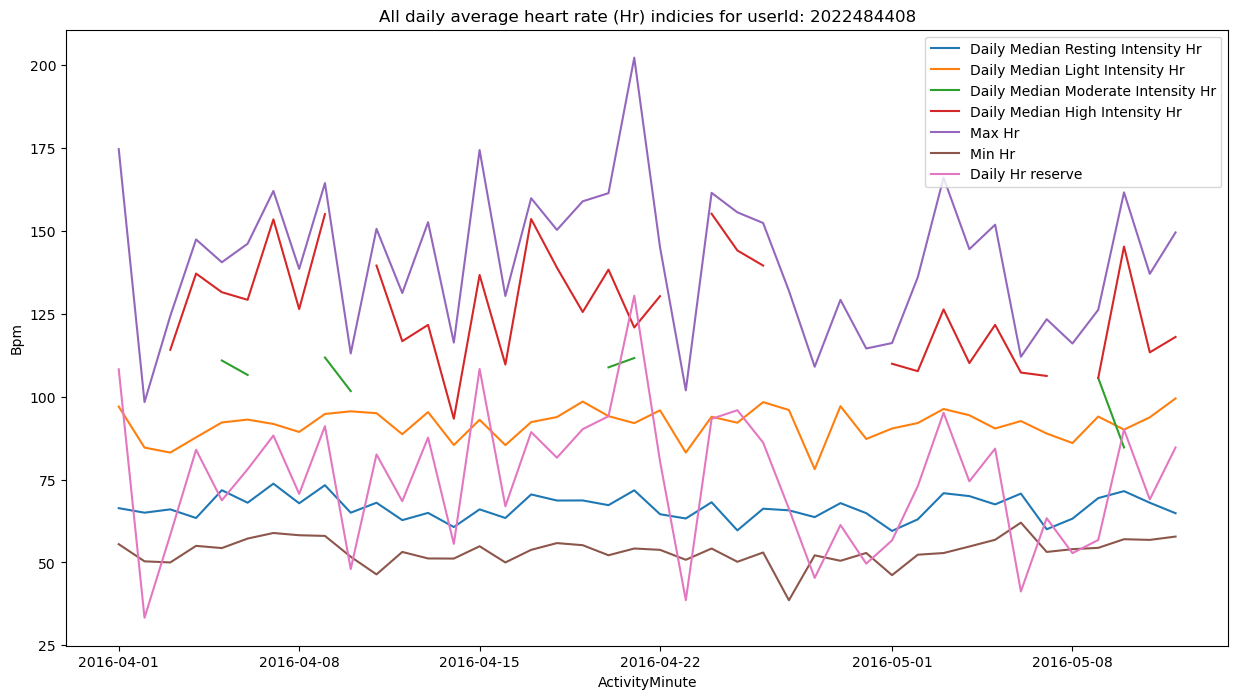

In [32]:
import matplotlib.pyplot as plt
median_hrs_df[median_hrs_df['Id'] == 2022484408].drop(columns=['Id']).set_index('ActivityMinute').plot(figsize=(15, 8))
plt.title(f"All daily average heart rate (Hr) indicies for userId: {2022484408}")
plt.ylabel('Bpm')
plt.show()

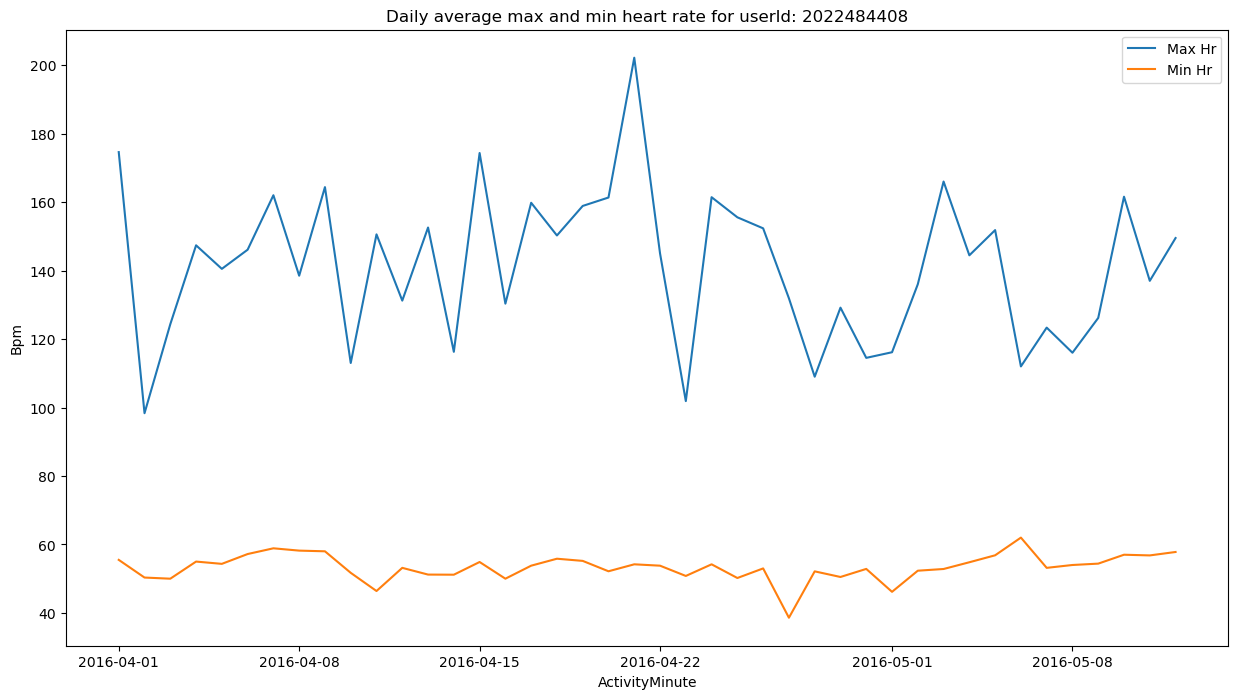

In [33]:
median_hrs_df[median_hrs_df['Id'] == 2022484408][['ActivityMinute', 'Max Hr', 'Min Hr']].set_index('ActivityMinute').plot(figsize=(15, 8))
plt.title(f"Daily average max and min heart rate for userId: {2022484408}")
plt.ylabel('Bpm')
plt.show()

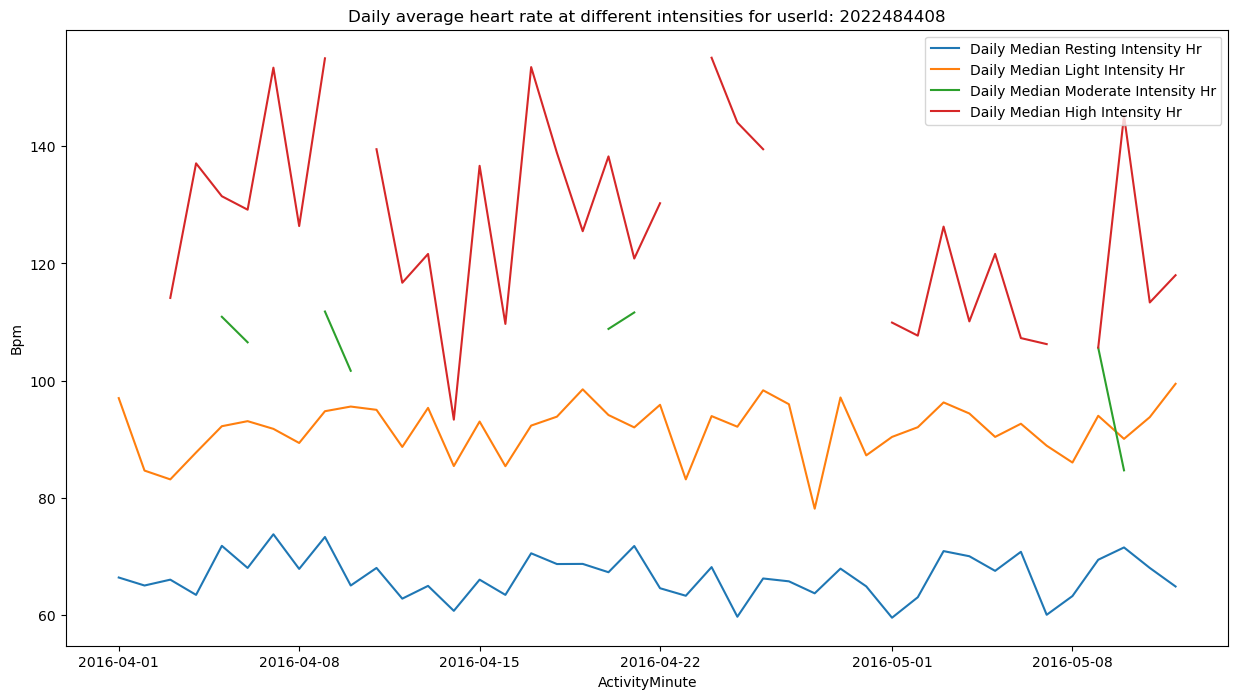

In [34]:
median_hrs_df[median_hrs_df['Id'] == 2022484408][['ActivityMinute', 'Daily Median Resting Intensity Hr', 'Daily Median Light Intensity Hr', 'Daily Median Moderate Intensity Hr', 
                                                  'Daily Median High Intensity Hr']].set_index('ActivityMinute').plot(figsize=(15, 8))
plt.title(f"Daily average heart rate at different intensities for userId: {2022484408}")
plt.ylabel('Bpm')
plt.show()